# Potato Clone Analysis

---


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Optionally display plots inline
%matplotlib inline

f1 = pd.read_csv('./output/processed_potatoes.csv')  
f2 = pd.read_csv('./output/predictions.csv')      

f1 = f1.drop(['Unnamed: 0', 'Unnamed: 0_a'], axis=1)
f2 = f2.drop('Unnamed: 0', axis=1)

### Predictions

In [12]:
f2[f2['pred'] == 1.0] # Warning: SVC probabilities may not align with predictions on small datasets

,Clone,Trial Region,pred,prob of 0,prob of 1,pred_binary
12,AOR16118-1,ONT,1.0,0.762548,0.237452,1
13,AOR16118-1,HER_Early,1.0,0.760769,0.239231,1
14,AOR16118-1,HER_Late,1.0,0.785383,0.214617,1
18,AOR18053-7,HER_Late,1.0,0.430347,0.569653,1
22,AOR18511-1,HER_Late,1.0,0.688247,0.311753,1
26,OR18002-2,HER_Late,1.0,0.719584,0.280416,1
30,OR18H019-2,HER_Late,1.0,0.791756,0.208244,1
34,AOR16066-5,HER_Late,1.0,0.356439,0.643561,1
38,AOR16071-6,HER_Late,1.0,0.773394,0.226606,1
45,AOR18069-1,HER_Late,1.0,0.732823,0.267177,1


## Data Summaries

First, we look at descriptive statistics for each of the datasets. 


In [3]:
print("----- f1: Processed Potatoes Descriptive Stats -----")
display(f1.describe())

print("\n----- Aggregate by Trial Region (f1) -----")
f1_grouped = f1.groupby('Trial Region').agg({
    'Total Yield': ['mean', 'std', 'min', 'max'],
    '%RB': ['mean', 'std'],
    'Growth Cracks': ['mean', 'std'],
    'Scab': ['mean', 'std'],
    'Shatter Bruise': ['mean', 'std']
})
display(f1_grouped)

print("\n----- f2: Predictions Descriptive Stats -----")
display(f2.describe())

print("\n----- Aggregate by Trial Region (f2) -----")
f2_grouped = f2.groupby('Trial Region').agg({
    'pred': ['mean', 'std', 'min', 'max'],
    'prob of 0': ['mean', 'std'],
    'prob of 1': ['mean', 'std']
})
display(f2_grouped)

----- f1: Processed Potatoes Descriptive Stats -----


,Year,Yr in trial,Total Yield,%RB,Y1s,%RB 1s,%1s,Over 20oz,10-20oz,6-10oz,...,Greening,Growth Cracks,Scab,Shatter Bruise,Y2s + Over 20oz,Ctrl ave,% CA,GDD 1-60,GDD 61-90,GDD 91-end
count,135.0,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,103.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,2024.0,0.925926,557.941481,1.286148,440.459259,1.500815,0.760222,29.528074,320.066741,172.038593,...,4.331111,4.502222,4.824272,4.708889,42.546593,527.127778,107.307032,656.168741,575.507704,870.127407
std,0.0,0.337454,200.546718,0.576572,197.131263,0.679436,0.161576,48.606619,299.049030,69.017011,...,0.613829,0.565087,0.273132,0.426451,51.332828,173.385243,26.709050,103.638309,100.736963,90.966355
min,2024.0,0.000000,203.700000,0.580000,60.900000,0.400000,0.230000,0.000000,1.360000,56.590000,...,2.100000,2.200000,3.700000,2.800000,0.000000,362.166667,56.244823,532.380000,427.220000,711.910000
25%,2024.0,1.000000,418.700000,0.925000,314.550000,1.040000,0.680000,2.425000,108.885000,122.510000,...,4.200000,4.300000,4.800000,4.600000,13.100000,451.533333,90.791598,532.380000,427.220000,897.710000
50%,2024.0,1.000000,517.800000,1.090000,436.400000,1.240000,0.820000,11.740000,202.080000,161.270000,...,4.500000,4.700000,5.000000,4.800000,24.160000,470.150000,103.583963,741.930000,640.480000,907.620000
75%,2024.0,1.000000,682.350000,1.425000,554.200000,1.825000,0.880000,39.925000,478.330000,198.255000,...,4.700000,4.900000,5.000000,5.000000,51.315000,643.391667,118.537431,756.890000,663.930000,930.240000
max,2024.0,2.000000,1170.600000,3.140000,1000.400000,3.690000,0.980000,347.750000,1170.600000,421.480000,...,5.300000,5.000000,5.000000,5.000000,355.650000,816.633333,189.399085,771.850000,687.380000,952.860000



----- Aggregate by Trial Region (f1) -----


Total Yield                                  %RB            \
                    mean         std    min     max      mean       std   
Trial Region                                                              
HER_Early     512.905714   80.158780  374.4   715.2  1.128286  0.175591   
HER_Late      569.091176  157.626662  272.7   855.2  2.087353  0.577845   
KF            351.237500   70.145175  203.7   472.7  0.995312  0.199111   
ONT           787.697059  170.665587  524.9  1170.6  0.921176  0.199754   

             Growth Cracks                Scab           Shatter Bruise  \
                      mean       std      mean       std           mean   
Trial Region                                                              
HER_Early         4.337143  0.663806  4.682857  0.351037       4.754286   
HER_Late          4.697059  0.353755  4.888235  0.120012       4.776471   
KF                4.462500  0.562684       NaN       NaN       5.000000   
ONT               4.514706  0.591932  4.905882  0.238609       4.320588   

                        
                   std  
Trial Region            
HER_Early     0.161506  
HER_Late      0.204582  
KF            0.000000  
ONT           0.652166


----- f2: Predictions Descriptive Stats -----


,pred,prob of 0,prob of 1
count,135.000000,135.000000,135.000000
mean,0.237037,0.851992,0.148008
std,0.426849,0.158147,0.158147
min,0.000000,0.206894,0.006170
25%,0.000000,0.814555,0.042413
50%,0.000000,0.908494,0.091506
75%,0.000000,0.957587,0.185445
max,1.000000,0.993830,0.793106



----- Aggregate by Trial Region (f2) -----


pred                     prob of 0           prob of 1  \
                  mean       std  min  max      mean       std      mean   
Trial Region                                                               
HER_Early     0.057143  0.235504  0.0  1.0  0.909647  0.062057  0.090353   
HER_Late      0.676471  0.474858  0.0  1.0  0.677539  0.211133  0.322461   
KF            0.156250  0.368902  0.0  1.0  0.890810  0.089739  0.109190   
ONT           0.058824  0.238833  0.0  1.0  0.930560  0.052386  0.069440   

                        
                   std  
Trial Region            
HER_Early     0.062057  
HER_Late      0.211133  
KF            0.089739  
ONT           0.052386

## Visualizations

Below, a boxplot compares Total Yield across trial regions (from **f1**), and a bar plot compares the mean probability of a "1" prediction across trial regions (from **f2**).


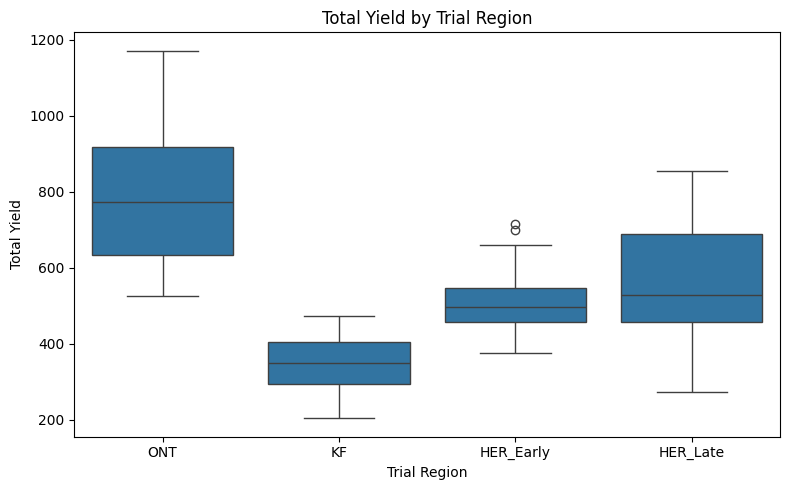

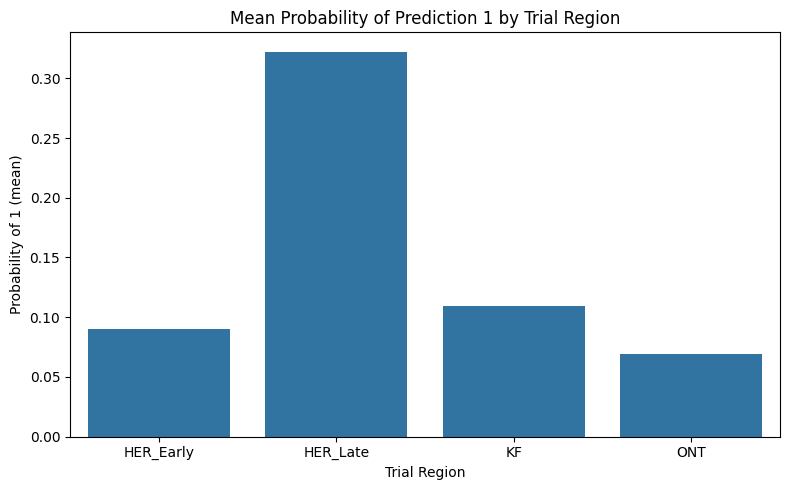

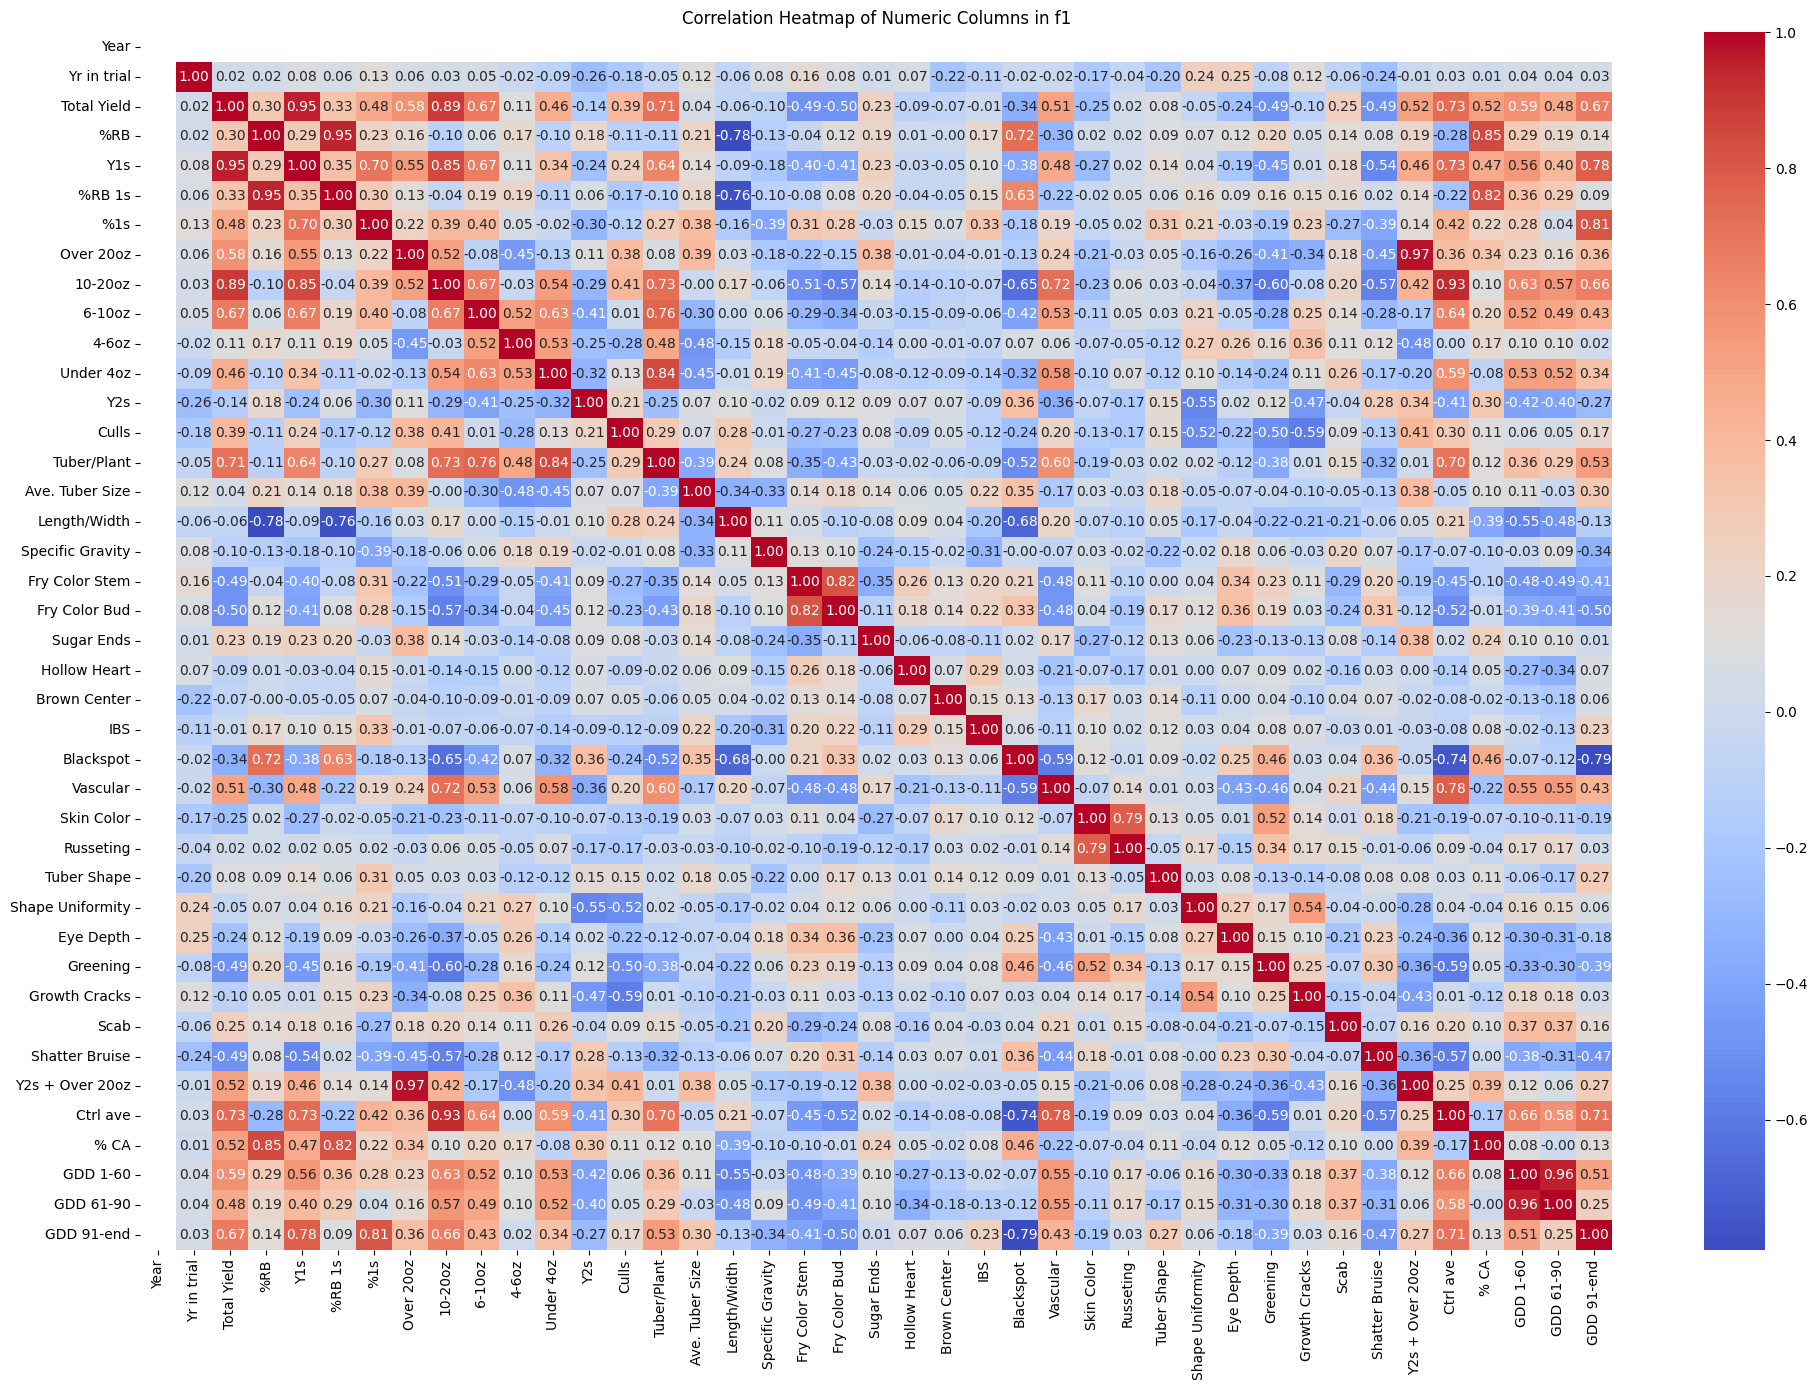

In [4]:
# Boxplot of Total Yield by Trial Region (f1)
plt.figure(figsize=(8, 5))
sns.boxplot(data=f1, x='Trial Region', y='Total Yield')
plt.title('Total Yield by Trial Region')
plt.tight_layout()
plt.show()

# Bar plot of Mean Probability of 1 by Trial Region (f2)
mean_prob_1 = f2.groupby('Trial Region')['prob of 1'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=mean_prob_1, x='Trial Region', y='prob of 1')
plt.title('Mean Probability of Prediction 1 by Trial Region')
plt.ylabel('Probability of 1 (mean)')
plt.tight_layout()
plt.show()

# Correlation Heatmap (f1)
numeric_cols = f1.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns in f1')
plt.tight_layout()
plt.show()

## Statistical Tests

We perform an ANOVA to test for differences in Total Yield among trial regions in **f1**, and a two-sample t-test looking at the probability of 1 in **f2** between two specific trial regions, “HER_Early” vs “HER_Late.”


In [8]:
# One-way ANOVA on Total Yield across f1's Trial Regions
model = ols('Q("Total Yield") ~ C(Q("Trial Region"))', data=f1).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print("===== One-Way ANOVA on Total Yield (by Trial Region) =====")
display(anova_results)

# T-test for probability of 1 in f2 between two trial regions
group_early = f2.loc[f2['Trial Region'] == 'HER_Early', 'prob of 1']
group_late = f2.loc[f2['Trial Region'] == 'HER_Late', 'prob of 1']
ttest_res = stats.ttest_ind(group_early, group_late, nan_policy='omit')
print("\n===== T-test: prob of 1 for HER_Early vs HER_Late =====")
print(f"T-statistic: {ttest_res.statistic:.3f}")
print(f"P-value: {ttest_res.pvalue:.3e}")

===== One-Way ANOVA on Total Yield (by Trial Region) =====


,sum_sq,df,F,PR(>F)
"C(Q(""Trial Region""))",3.237243e+06,3.0,65.684458,5.513518e-26
Residual,2.152101e+06,131.0,NaN,NaN



===== T-test: prob of 1 for HER_Early vs HER_Late =====
T-statistic: -6.234
P-value: 3.465e-08


                            OLS Regression Results                            
Dep. Variable:       Q("Total Yield")   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     126.6
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           2.41e-43
Time:                        04:17:41   Log-Likelihood:                -569.99
No. Observations:                 103   AIC:                             1154.
Df Residuals:                      96   BIC:                             1172.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

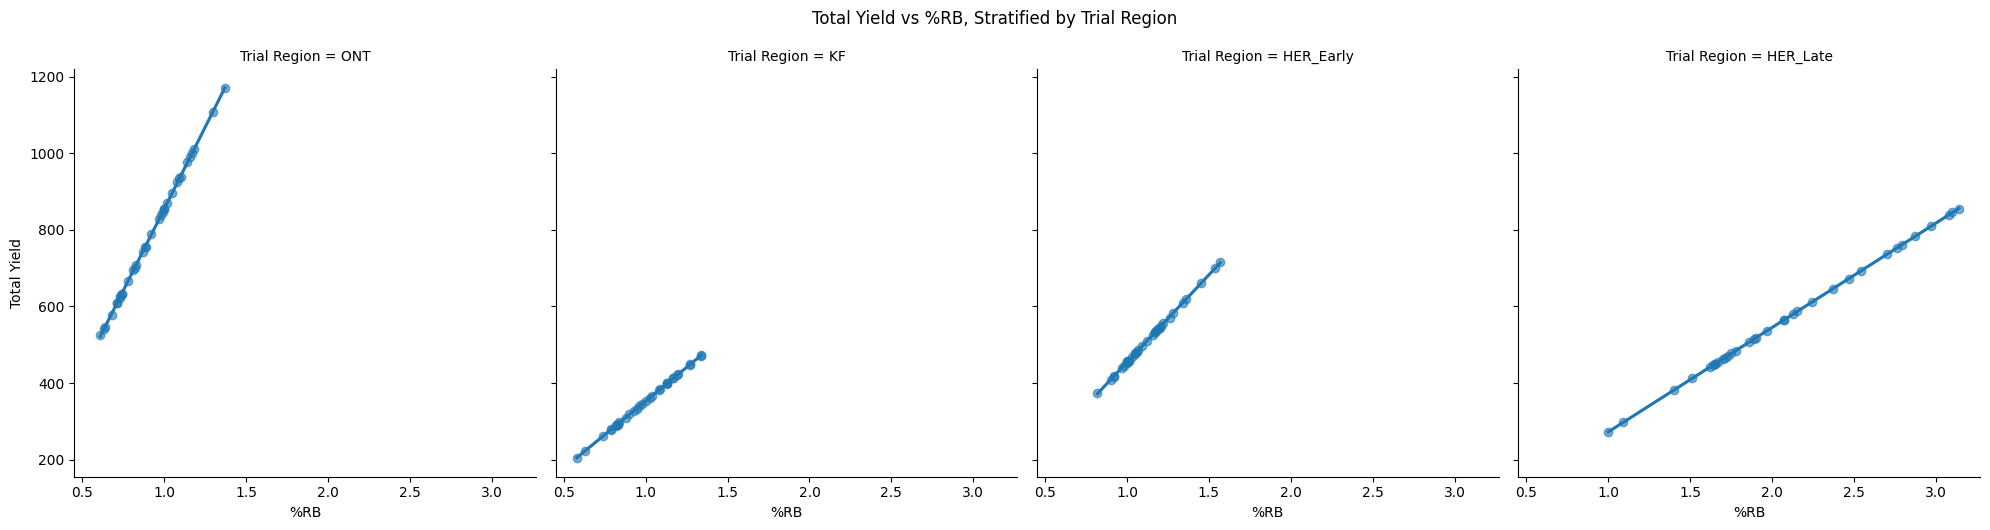

In [9]:
import statsmodels.formula.api as smf


# Trial Region as a categorical predictor to hold it constant
model_region_control = smf.ols('Q("Total Yield") ~ C(Q("Trial Region")) + Q("%RB") + Q("Growth Cracks") + Q("Scab") + Q("Shatter Bruise")',
                               data=f1).fit()
print(model_region_control.summary())

# The above regression adjusts for region while estimating the effects
# of %RB, Growth Cracks, Scab, and Shatter Bruise on Total Yield.

# Assume 'pred' is logistic:
f2['pred_binary'] = (f2['pred'] > 0.5).astype(int)  # .5 thresholding
model_logit_region = smf.logit('pred_binary ~ C(Q("Trial Region")) + Q("prob of 1")',
                               data=f2).fit()
print(model_logit_region.summary())

# Hold region constant by performing separate analyses:
regions = f1['Trial Region'].unique()

# Separate correlation of Total Yield vs %RB within each region
for r in regions:
    subset = f1.loc[f1['Trial Region'] == r]
    corr = subset['Total Yield'].corr(subset['%RB'])
    print(f"Region: {r}, Correlation (Total Yield vs %RB): {corr:.3f}")

# Region-specific plots:
sns.lmplot(data=f1, x='%RB', y='Total Yield', col='Trial Region', ci=None, scatter_kws={'alpha':0.6})
plt.suptitle('Total Yield vs %RB, Stratified by Trial Region', y=1.05)
plt.show()